<img src="./img/logo.png">  <br>
* ref : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# -------------------------------------------------
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis

import matplotlib.image as img

#-------------------- 주피터 셀 넓이 조절 ---------------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

sns.set()

In [2]:
train = pd.read_csv("./dataset/train.csv")
X_test = pd.read_csv("./dataset/test.csv")
sub = pd.read_csv("./dataset/sample_submission.csv")
train_test = pd.concat([train, X_test], axis=0)

In [3]:
train.shape, X_test.shape, train_test.shape

((1460, 81), (1459, 80), (2919, 81))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 공통함수 

In [7]:
def like(df, *search_str):
    for str in search_str:        
        col_list = train.columns[train.columns.str.contains(str, case=False)]
        for col in col_list:
            print(f'{col} \t\t {df[col].unique()[:10]}') 
        print("--"*30)
like(train, 'Area')

LotArea 		 [ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]
MasVnrArea 		 [196.   0. 162. 350. 186. 240. 286. 306. 212. 180.]
GrLivArea 		 [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077]
GarageArea 		 [548 460 608 642 836 480 636 484 468 205]
PoolArea 		 [  0 512 648 576 555 480 519 738]
------------------------------------------------------------


GrLivArea 피쳐와 (+)상관관계 TOP-10 
 ['GrLivArea', 'TotRmsAbvGrd', 'SalePrice', '2ndFlrSF', 'FullBath', 'OverallQual', '1stFlrSF', 'BedroomAbvGr', 'GarageArea', 'GarageCars']
TotRmsAbvGrd		 0.83
SalePrice		 0.71
2ndFlrSF		 0.69
FullBath		 0.63
OverallQual		 0.59
1stFlrSF		 0.57
BedroomAbvGr		 0.52
GarageArea		 0.47
GarageCars		 0.47
target 피쳐와 (-) 상관관계 TOP-n
 ['OverallCond', 'YrSold', 'BsmtHalfBath', 'BsmtFinSF2', 'MiscVal', 'GrLivArea']
OverallCond		 -0.08
YrSold		 -0.04
BsmtHalfBath		 -0.02
BsmtFinSF2		 -0.01
MiscVal		 -0.00


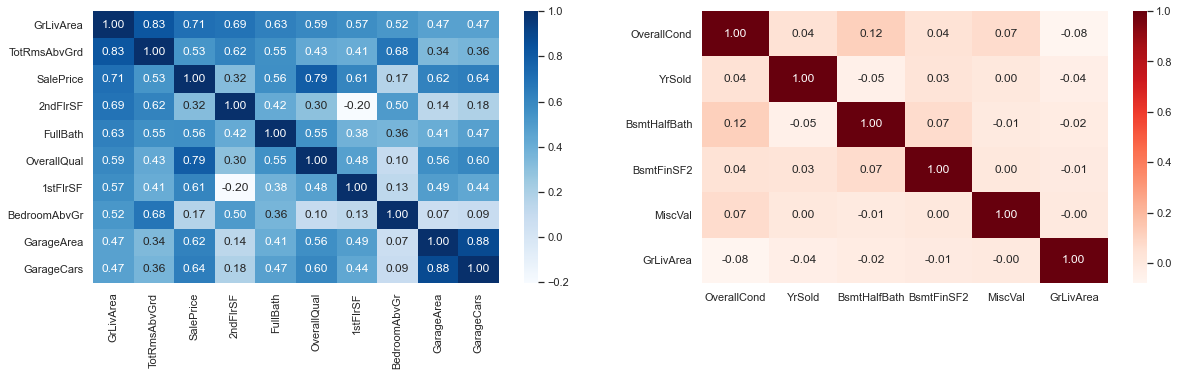

In [8]:
def corr_col(df, col, n = 10, chart=False):
    corr_df = train.corr().nlargest(n, col)
    top_corr_large = corr_df.index
    print(f'{col} 피쳐와 (+)상관관계 TOP-{n} \n {top_corr_large.values.tolist()}')
    for c in top_corr_large:
        if c != col:
            print(f'{c}\t\t {corr_df.loc[col][c]:.2f}')
   

    corr_df = df.corr().nsmallest(5, col)
    top_corr_small = corr_df.index
    top_corr_small = np.append(top_corr_small.values, col)    
    print("target 피쳐와 (-) 상관관계 TOP-n\n", top_corr_small.tolist())
    corr_df = train[top_corr_small].corr()
    for c in top_corr_small:
        if c != col:
            print(f'{c}\t\t {corr_df.loc[col][c]:.2f}')
    
    if chart == True :  
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
        sns.heatmap(train[top_corr_large].corr(), annot=True, cmap='Blues', fmt='0.2f' , ax=ax1)
        sns.heatmap(train[top_corr_small].corr(), annot=True, cmap='Reds', fmt='0.2f' , ax=ax2)
        plt.show()
        
corr_col(train, 'GrLivArea', 10, chart=True)

In [9]:
'd' in 'abc'

False

In [83]:
def gubun(x):
    g = ""
    if x['dtype']=='object':
            g = "카테"
    else:
        if ('Cond' in x['col']) | ('Qual' in x['col']) | ('MSSubClass' in x['col'] ) :
            g = "이산"
        else:
            g = "연속"
    return g


def info(df):
    #print(df.isna().sum()[df.isna().sum()>0].sort_values(ascending=False).index.values.tolist())
    df_info = pd.DataFrame({"col": df.columns, 
                           "nan_cnt":df.isna().sum() , 
                           "rate":np.round(df.isna().sum() / df.shape[0],2)*100
                          })
    #df_info = df_info[df_info['nan_cnt']>0]
    df_info = df_info.sort_values(by='nan_cnt', ascending=False)
    df_info['dtype'] = [df[col].dtypes for col in df_info.index]
    df_info['nunique'] = [df[col].nunique() for col in df_info.index]
    df_info['unique'] = [','.join(map(str, df[col].unique()[:10])) for col in df_info.index]
    
    df_info['구분'] = df_info.apply(lambda x: gubun(x), axis=1)
#     df_info[df_info['col'] == 'LowQualFinSF']['구분'] = '연속'  조건절이 들어간 프레임은 람다로만 변경 가능 XXXXX
    df_info.loc['LowQualFinSF', '구분'] = '연속'

    return df_info
df_info = info(train)
df_info

# df_info[df_info['구분']=='카테']
# df_info[df_info['구분']=='연속']
# df_info[df_info['구분']=='이산']


,col,nan_cnt,rate,dtype,nunique,unique,구분
MSSubClass,MSSubClass,0,0.0,int64,15,"60,20,70,50,190,45,90,120,30,85",이산
ExterCond_TA,ExterCond_TA,0,0.0,uint8,2,"1,0",이산
BsmtExposure_Av,BsmtExposure_Av,0,0.0,uint8,2,"0,1",연속
BsmtCond_TA,BsmtCond_TA,0,0.0,uint8,2,"1,0",이산
BsmtCond_Po,BsmtCond_Po,0,0.0,uint8,2,"0,1",이산
BsmtCond_NAN,BsmtCond_NAN,0,0.0,uint8,2,"0,1",이산
BsmtCond_Gd,BsmtCond_Gd,0,0.0,uint8,2,"0,1",이산
BsmtCond_Fa,BsmtCond_Fa,0,0.0,uint8,2,"0,1",이산
BsmtQual_TA,BsmtQual_TA,0,0.0,uint8,2,"1,0",이산
BsmtQual_Gd,BsmtQual_Gd,0,0.0,uint8,2,"0,1",이산


####  결측이 일관적이지 않는 경우 

In [11]:
like(train_test, 'bsmt')

BsmtQual 		 ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond 		 ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure 		 ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 		 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinSF1 		 [ 706.  978.  486.  216.  655.  732. 1369.  859.    0.  851.]
BsmtFinType2 		 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtFinSF2 		 [  0.  32. 668. 486.  93. 491. 506. 712. 362.  41.]
BsmtUnfSF 		 [150. 284. 434. 540. 490.  64. 317. 216. 952. 140.]
TotalBsmtSF 		 [ 856. 1262.  920.  756. 1145.  796. 1686. 1107.  952.  991.]
BsmtFullBath 		 [ 1.  0.  2.  3. nan]
BsmtHalfBath 		 [ 0.  1.  2. nan]
------------------------------------------------------------


In [12]:
# 'c' in 'abc'
# pd.Series(['abc']).str.contains('c', case=False)

In [13]:
df_info[df_info.index.str.contains('Bsmt', case=False)]

,col,nan_cnt,rate,dtype,nunique,unique,구분
BsmtFinType2,BsmtFinType2,38,3.0,object,6,"Unf,BLQ,nan,ALQ,Rec,LwQ,GLQ",카테
BsmtExposure,BsmtExposure,38,3.0,object,4,"No,Gd,Mn,Av,nan",카테
BsmtQual,BsmtQual,37,3.0,object,4,"Gd,TA,Ex,nan,Fa",카테
BsmtCond,BsmtCond,37,3.0,object,4,"TA,Gd,nan,Fa,Po",카테
BsmtFinType1,BsmtFinType1,37,3.0,object,6,"GLQ,ALQ,Unf,Rec,BLQ,nan,LwQ",카테
BsmtHalfBath,BsmtHalfBath,0,0.0,int64,3,"0,1,2",연속
BsmtFullBath,BsmtFullBath,0,0.0,int64,4,"1,0,2,3",연속
BsmtFinSF2,BsmtFinSF2,0,0.0,int64,144,"0,32,668,486,93,491,506,712,362,41",연속
TotalBsmtSF,TotalBsmtSF,0,0.0,int64,721,"856,1262,920,756,1145,796,1686,1107,952,991",연속
BsmtUnfSF,BsmtUnfSF,0,0.0,int64,780,"150,284,434,540,490,64,317,216,952,140",연속


#### 데이터 332 rows 확인

In [14]:
cols = df_info[df_info.index.str.contains('bsmt', case=False)].index
train_test[(train_test['BsmtFinType2'].isna()) | (train_test['BsmtQual'].isna())][cols][:10]

,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
182,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
259,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
332,NaN,No,Gd,TA,GLQ,0.0,1.0,479.0,3206.0,1603.0,1124.0
342,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
362,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
cols = df_info[df_info.index.str.contains('bsmt', case=False)].index
train_test[(train_test['BsmtFinType2'].isna()) & (train_test['BsmtQual'].notnull())][cols]

,BsmtFinType2,BsmtExposure,BsmtQual,BsmtCond,BsmtFinType1,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF,BsmtFinSF1
332,NaN,No,Gd,TA,GLQ,0.0,1.0,479.0,3206.0,1603.0,1124.0


### 결측이 일관적이지 않는 경우

In [16]:
df_info[df_info.index.str.contains('Garage', case=False)]

,col,nan_cnt,rate,dtype,nunique,unique,구분
GarageYrBlt,GarageYrBlt,81,6.0,float64,97,"2003.0,1976.0,2001.0,1998.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0",연속
GarageCond,GarageCond,81,6.0,object,5,"TA,Fa,nan,Gd,Po,Ex",카테
GarageType,GarageType,81,6.0,object,6,"Attchd,Detchd,BuiltIn,CarPort,nan,Basment,2Types",카테
GarageFinish,GarageFinish,81,6.0,object,3,"RFn,Unf,Fin,nan",카테
GarageQual,GarageQual,81,6.0,object,5,"TA,Fa,Gd,nan,Ex,Po",카테
GarageCars,GarageCars,0,0.0,int64,5,"2,3,1,0,4",연속
GarageArea,GarageArea,0,0.0,int64,441,"548,460,608,642,836,480,636,484,468,205",연속


* 샘플 1116 예

In [17]:
train_test.loc[1116][['GarageCars','GarageArea','GarageYrBlt','GarageQual','GarageType']]

,GarageCars,GarageArea,GarageYrBlt,GarageQual,GarageType
1116,2.0,527.0,2002.0,TA,BuiltIn
1116,NaN,NaN,NaN,NaN,Detchd


* 주차장이 없는데도 GarageType이 있는 경우 예

In [18]:
train_test[(train_test['GarageQual'].isna()) & train_test['GarageType'].notnull()][['GarageYrBlt','GarageQual','GarageType']]

,GarageYrBlt,GarageQual,GarageType
666,NaN,NaN,Detchd
1116,NaN,NaN,Detchd


In [19]:
idx = train_test[(train_test['GarageQual'].isna()) & train_test['GarageType'].notnull()][['GarageYrBlt','GarageQual','GarageType']].index
train_test.loc[idx, 'GarageType'] = np.nan

* 이외 차고지 관렴 모든 결측은 아래와 같이 처리

In [20]:
idx = train_test[train_test['GarageArea'].isna()].index
train_test.loc[idx, 'GarageType']  = np.nan
train_test.loc[idx, 'GarageCond']  = np.nan
train_test.loc[idx, 'GarageQual']  = np.nan
train_test.loc[idx, 'GarageFinish'] = np.nan
train_test.loc[idx, 'GarageYrBlt'] = 0
train_test.loc[idx, 'GarageCars']  = 0
train_test.loc[idx, 'GarageArea']  = 0

#### Id : 유니크 피쳐 삭제

In [21]:
train.drop("Id", axis=1, inplace=True)
X_test.drop("Id", axis=1, inplace=True)

## target 
* 분류 : 불균형 확인
* 회귀 : 불균화(정규분포여부), 로그(지수)

#### SalePrice

In [22]:
y = train['SalePrice']
X = train.drop(['SalePrice'], axis=1)

In [23]:
y.shape , X.shape

((1460,), (1460, 79))

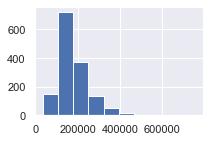

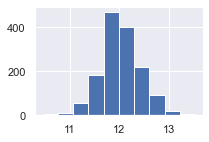

In [24]:
y.hist(figsize=(3,2))
plt.show()

y_log = np.log1p(y)
y_log.hist(figsize=(3,2))
plt.show()

## 1차점수 : 무조건 점수보다 보자(nan x, object x)

#### 모델
* Lasso, Ridge, ElasicNet , RandomForestRegressor, XGBoostRegressor , LightGBMRegressor, *TreeRegressor

#### 평가 매트릭스 
* RMSE  -- np.sqrt(MSE)
* ‘neg_mean_squared_error’   metrics.mean_squared_error(square=False)

* RMSE = $\sqrt{\frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 } $ 
 ---


#### 결측처리 
* object 타입 - 'NAN'
* numeric 타입 - 0

In [25]:
cols_obj = train.select_dtypes(include='object').columns.values.tolist()
cols_num = train.select_dtypes(exclude='object').columns.values.tolist()
train[cols_obj] = train[cols_obj].fillna('NAN')  #, inplace=True)
train[cols_num] = train[cols_num].fillna(0)  #, inplace=True)

#---------------------
cols_obj = X_test.select_dtypes(include='object').columns.values.tolist()
cols_num = X_test.select_dtypes(exclude='object').columns.values.tolist()
X_test[cols_obj] = X_test[cols_obj].fillna('NAN')  #, inplace=True)
X_test[cols_num] = X_test[cols_num].fillna(0)  #, inplace=True)


In [26]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

In [27]:
X_test.isna().sum()[X_test.isna().sum()>0]

Series([], dtype: int64)

In [28]:
train.shape, X_test.shape

((1460, 80), (1459, 79))

#### object 처리
* pd.get_dummies() = LabelEncoder() + OneHotEncoder()

In [29]:
train_test = pd.concat([train, X_test], axis=0)
train_test = pd.get_dummies(train_test)
train  = train_test.iloc[:len(train), :]
X_test = train_test.iloc[len(train):, :]
X_test.drop(['SalePrice'], axis=1, inplace=True)

In [30]:
train.shape, X_test.shape

((1460, 312), (1459, 311))

#### 타겟피쳐 로그변환

In [31]:
y_log = np.log1p(train['SalePrice'])
X = train.drop(['SalePrice'], axis=1)

#### 모델선정&학습&평가
* LinearRegression	 RMSE:146006.0727
* Ridge	 RMSE:119478.1456

In [32]:
X_train, X_val, y_train, y_val =train_test_split(X, y_log, test_size=0.2, random_state=1414)
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), DecisionTreeRegressor(),XGBRegressor(), LGBMRegressor()]
for model in models:
    model.fit(X_train,  y_train)
    pred = model.predict(X_val)
    
    #--------error : Mean Squared Logarithmic Error cannot be used when targets contain negative values.
    #--------로그값y를 지수화해서 원래값으로 복원
    y_val_exp = np.expm1(y_val) 
    pred_exp = np.expm1(pred)    
    #print(y_log[:5], pred[:5], y_val_exp[:5],pred_exp[:5]) 
          
    rmse = mean_squared_error(y_val_exp, pred_exp, squared=False)
    print(f"{model.__class__.__name__}\t RMSE:{rmse:.4f}")    

#  목표점수 ----------- 4628명 참가 / 0.05139  ~ 123.56653     0.05< ㅌ < 한자리수.00
  

LinearRegression	 RMSE:146323.3150
Ridge	 RMSE:119954.9565
Lasso	 RMSE:313169.5661
ElasticNet	 RMSE:276313.6288
RandomForestRegressor	 RMSE:36788.1506
DecisionTreeRegressor	 RMSE:46838.2559
XGBRegressor	 RMSE:41018.6984
LGBMRegressor	 RMSE:36076.7478


## 1차 submission : 0.13941

In [33]:
pred = model.predict(X_test)
#--------로그값y를 지수화해서 원래값으로 복원
pred_exp = np.expm1(pred)   
sub['SalePrice'] = pred_exp
sub.head()
sub.to_csv("lkh_v01.csv", index=False)

# EDA & Feature Engineering

In [34]:
train = pd.read_csv("./dataset/train.csv")
X_test = pd.read_csv("./dataset/test.csv")
train_test = pd.concat([train, X_test] , axis=0)

### Object 타입

In [35]:
# for col in cols_obj:
#     print(f'{col} \t\t {train_test[col].nunique()} \t\t {train_test[col].unique()}')

df_info = info(train_test)
# df_info[df_info.dtype=='object']
cate_cols = df_info[df_info['구분'] == '카테']['col'].values.tolist()
print(cate_cols)
df_info[df_info['구분'] == '카테']


['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities', 'SaleType', 'Electrical', 'Exterior2nd', 'Exterior1st', 'KitchenQual', 'SaleCondition', 'PavedDrive', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'CentralAir', 'HeatingQC']


,col,nan_cnt,rate,dtype,nunique,unique,구분
PoolQC,PoolQC,2909,100.0,object,3,"nan,Ex,Fa,Gd",카테
MiscFeature,MiscFeature,2814,96.0,object,4,"nan,Shed,Gar2,Othr,TenC",카테
Alley,Alley,2721,93.0,object,2,"nan,Grvl,Pave",카테
Fence,Fence,2348,80.0,object,4,"nan,MnPrv,GdWo,GdPrv,MnWw",카테
FireplaceQu,FireplaceQu,1420,49.0,object,5,"nan,TA,Gd,Fa,Ex,Po",카테
GarageFinish,GarageFinish,159,5.0,object,3,"RFn,Unf,Fin,nan",카테
GarageQual,GarageQual,159,5.0,object,5,"TA,Fa,Gd,nan,Ex,Po",카테
GarageCond,GarageCond,159,5.0,object,5,"TA,Fa,nan,Gd,Po,Ex",카테
GarageType,GarageType,157,5.0,object,6,"Attchd,Detchd,BuiltIn,CarPort,nan,Basment,2Types",카테
BsmtExposure,BsmtExposure,82,3.0,object,4,"No,Gd,Mn,Av,nan",카테


### Numeric 타입

In [36]:
# dis_cols=[]   #distri.. : 이산형 1~5 [1,2,3,4,5] 몇개  == 범주형(카테고리):ABCDE=명목형
# cont_cols=[]  #continue : 연속형 174.325,17.635 ,
# for col in cols_num:
#     #print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')
#     if(train[col].nunique() < 16):
#         dis_cols.append(col)
#     else:
#         cont_cols.append(col)
        

# for col in dis_cols:
#     print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')
# print("--"*50)    
# for col in cont_cols:    
#     print(f'{col} \t\t {train[col].nunique()} \t\t {train[col].unique()[:5]}')

### 이산형

In [37]:
dist_cols = df_info[df_info['구분'] == '이산']['col'].values.tolist()
print(dist_cols)
df_info[df_info['구분'] == '이산']

['OverallQual', 'OverallCond', 'MSSubClass']


,col,nan_cnt,rate,dtype,nunique,unique,구분
OverallQual,OverallQual,0,0.0,int64,10,"7,6,8,5,9,4,10,3,1,2",이산
OverallCond,OverallCond,0,0.0,int64,9,"5,8,6,7,4,2,3,9,1",이산
MSSubClass,MSSubClass,0,0.0,int64,16,"60,20,70,50,190,45,90,120,30,85",이산


### 연속형

In [38]:
cont_cols = df_info[df_info['구분'] == '연속']['col'].values.tolist()
print(cont_cols)
df_info[df_info['구분'] == '연속']

['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'BsmtUnfSF', 'Fireplaces', 'TotRmsAbvGrd', 'OpenPorchSF', 'YrSold', 'WoodDeckSF', 'MoSold', 'MiscVal', 'PoolArea', 'ScreenPorch', 'BedroomAbvGr', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'Id', 'HalfBath', 'FullBath', 'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']


,col,nan_cnt,rate,dtype,nunique,unique,구분
SalePrice,SalePrice,1459,50.0,float64,663,"208500.0,181500.0,223500.0,140000.0,250000.0,143000.0,307000.0,200000.0,129900.0,118000.0",연속
LotFrontage,LotFrontage,486,17.0,float64,128,"65.0,80.0,68.0,60.0,84.0,85.0,75.0,nan,51.0,50.0",연속
GarageYrBlt,GarageYrBlt,159,5.0,float64,103,"2003.0,1976.0,2001.0,1998.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0",연속
MasVnrArea,MasVnrArea,23,1.0,float64,444,"196.0,0.0,162.0,350.0,186.0,240.0,286.0,306.0,212.0,180.0",연속
BsmtHalfBath,BsmtHalfBath,2,0.0,float64,3,"0.0,1.0,2.0,nan",연속
BsmtFullBath,BsmtFullBath,2,0.0,float64,4,"1.0,0.0,2.0,3.0,nan",연속
BsmtFinSF1,BsmtFinSF1,1,0.0,float64,991,"706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0",연속
BsmtFinSF2,BsmtFinSF2,1,0.0,float64,272,"0.0,32.0,668.0,486.0,93.0,491.0,506.0,712.0,362.0,41.0",연속
GarageCars,GarageCars,1,0.0,float64,6,"2.0,3.0,1.0,0.0,4.0,5.0,nan",연속
TotalBsmtSF,TotalBsmtSF,1,0.0,float64,1058,"856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0",연속


### 연속형 데이터 분포도 

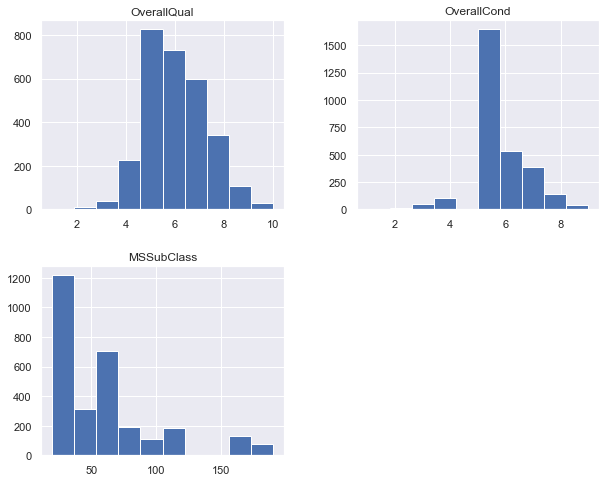

In [39]:
train_test[dist_cols].hist(figsize=(10,8))
plt.show()

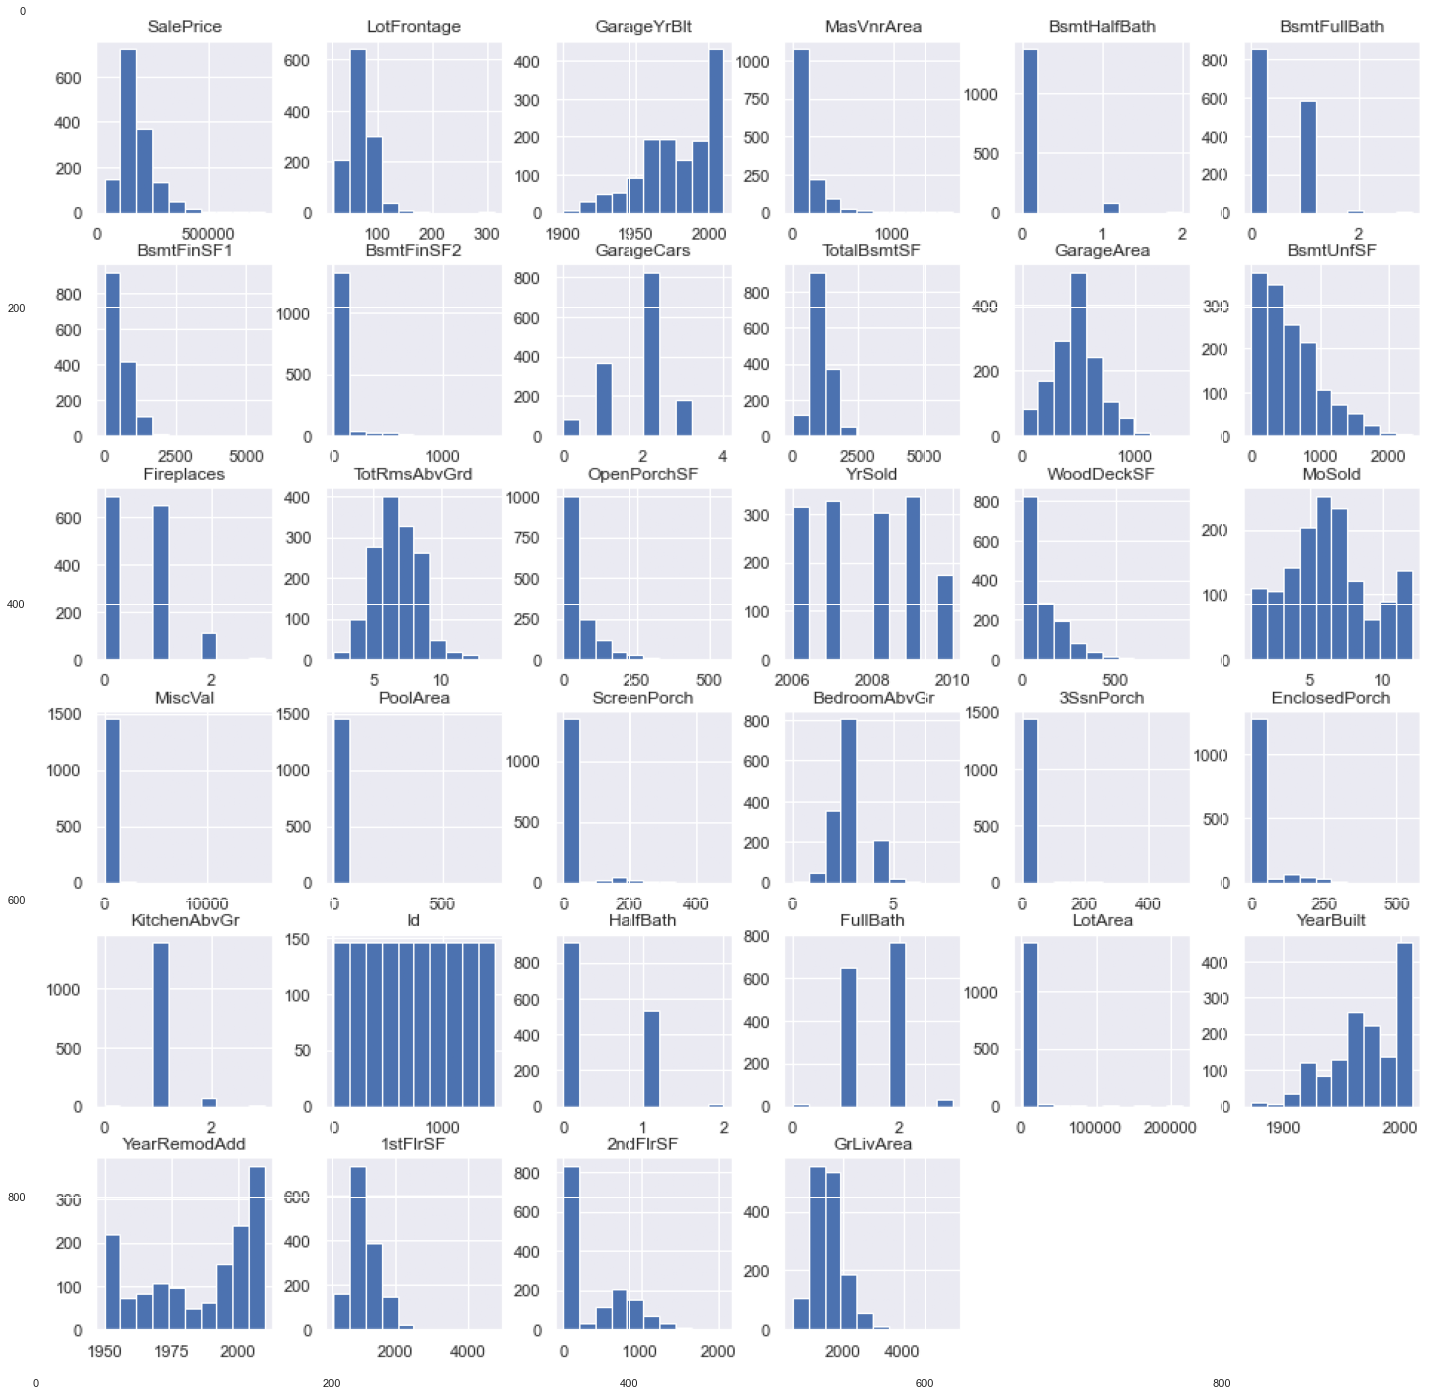

In [40]:
# train[cont_cols].hist(figsize=(16,16))
# plt.show()

image = img.imread('./img/2.png')
fig = plt.figure(frameon=False)
fig.set_size_inches(25,25)
plt.imshow(image)


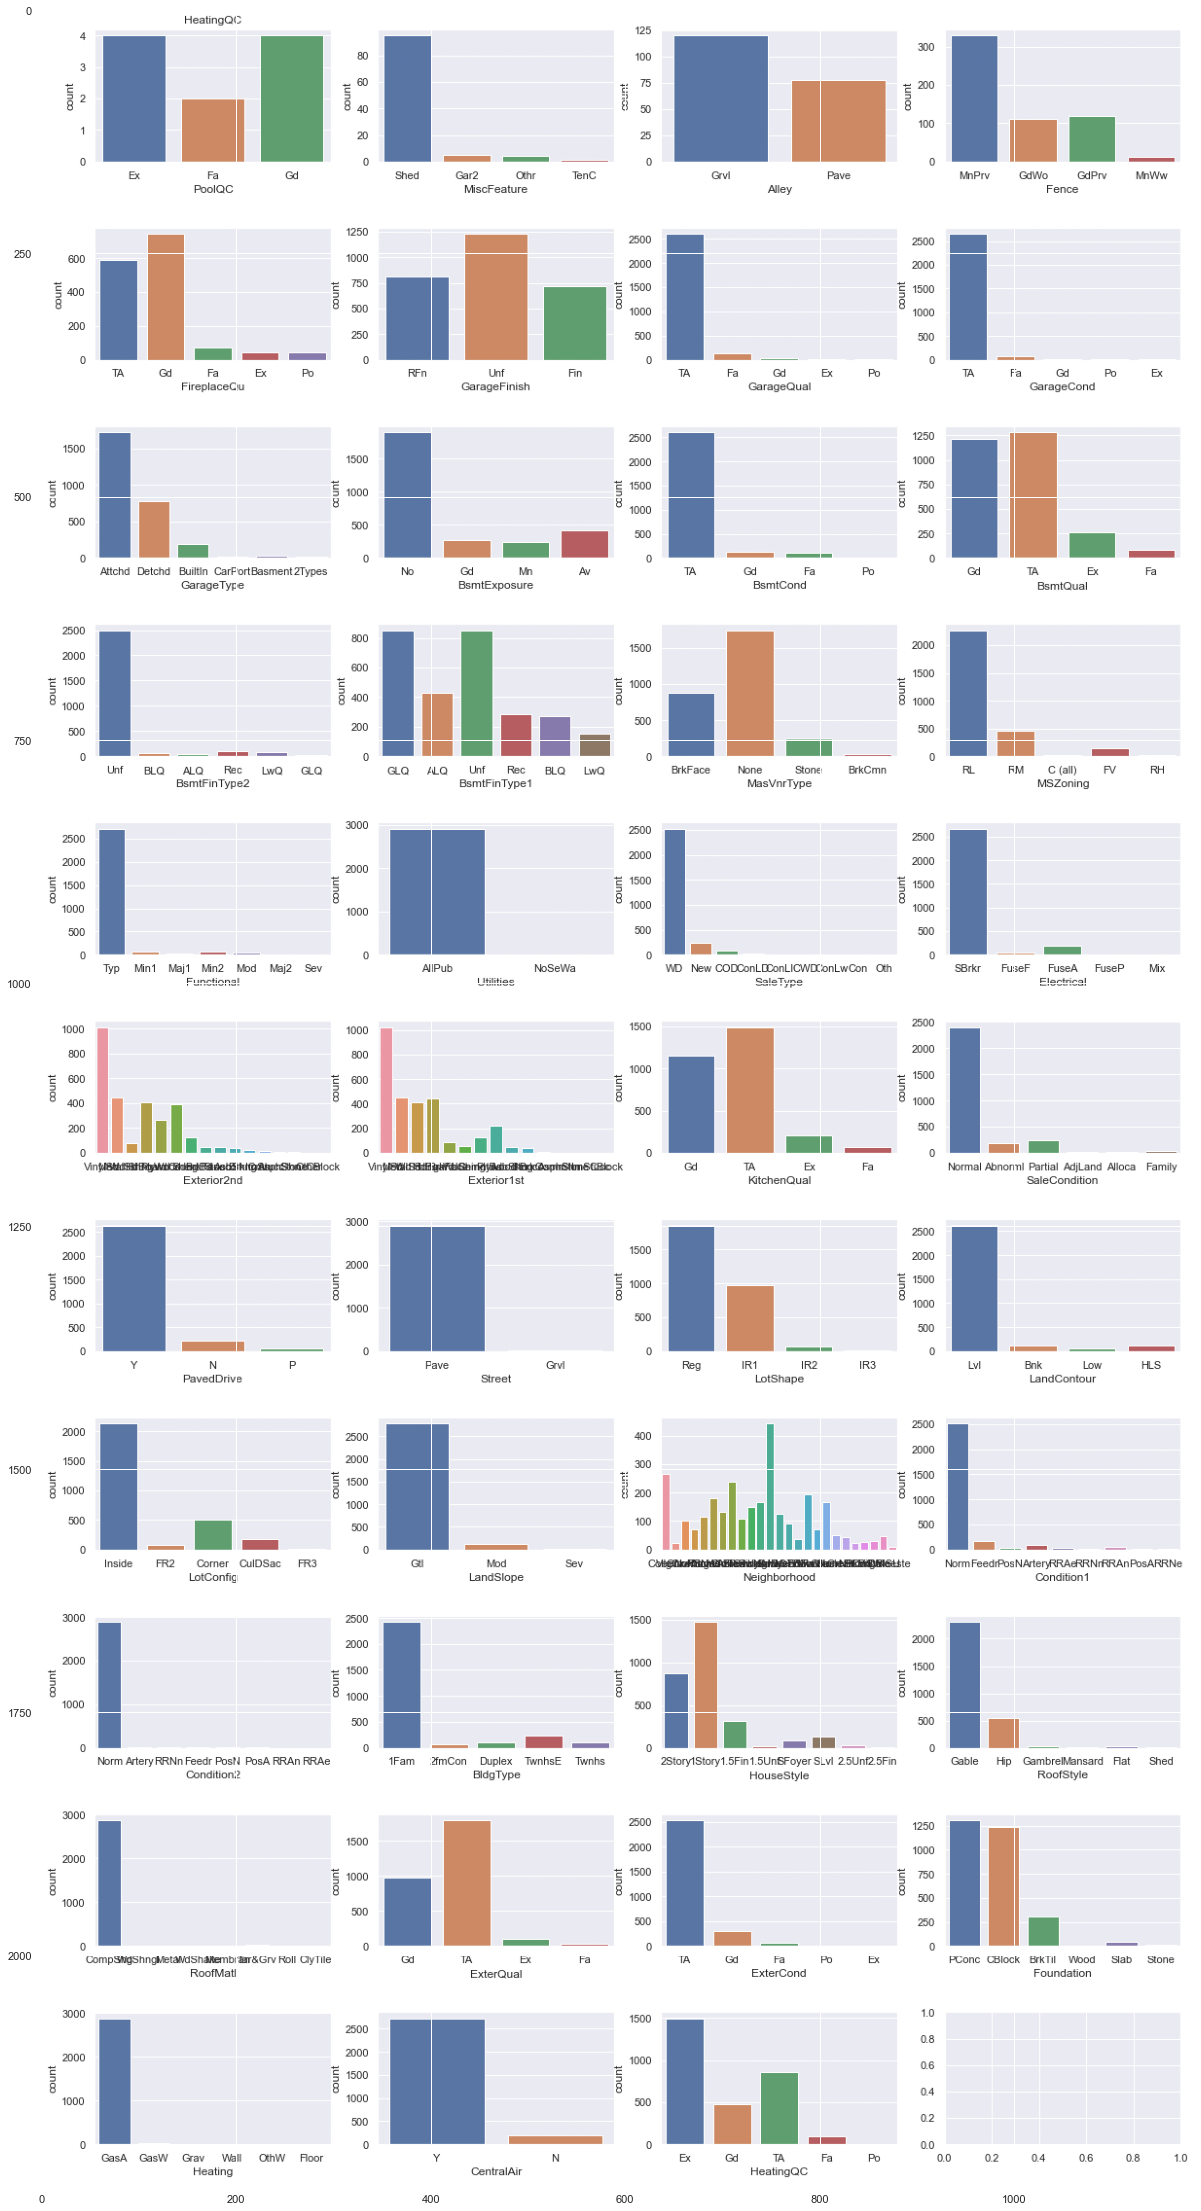

In [41]:
# print(len(cate_cols))
# f,ax=plt.subplots(11,4,figsize=(20,40))
# for i, col in enumerate(cate_cols) :
#     r = i//4
#     c = i%4
#     sns.countplot(col,data=train_test,ax=ax[r,c])
#     ax[0,0].set_title(col)
#     plt.subplots_adjust(wspace=0.2,hspace=0.5)
# plt.show()

image = img.imread('./img/3.png')
fig = plt.figure(frameon=False)
fig.set_size_inches(30,40)
plt.imshow(image)

### cond = 0.5 , 피쳐별 상관계수 

In [42]:
def corr(df, cond = 0.5):
    pd.set_option('display.max.columns', 100)
    dict_list=[]
    for i, idx in enumerate(df.corr().index):
        for j, col in enumerate(df.corr().columns):
            dict = {}
            if (i<=j) & ( np.abs(df[idx].corr(df[col])) > cond) & (idx != col):
                #print(f"{idx} \t {col} \t {df[idx].corr(df[col]):.2f}")
                dict["col1"]=idx
                dict["col2"]=col
                dict["corr"]=np.round(df[idx].corr(df[col]),3)
                #dict["abs_corr"]=np.abs(np.round(df[idx].corr(df[col]),3))
                dict_list.append(dict)
    corr_df = pd.DataFrame(dict_list)
    corr_df[['col1','col2','corr']].sort_values(by=["corr"], ascending=False)
    return corr_df.T
corr(train_test, 0.6) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
col1,OverallQual,OverallQual,YearBuilt,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,2ndFlrSF,GrLivArea,GrLivArea,GrLivArea,BedroomAbvGr,GarageCars,GarageCars,GarageArea
col2,GarageCars,SalePrice,YearRemodAdd,GarageYrBlt,GarageYrBlt,BsmtFullBath,1stFlrSF,SalePrice,SalePrice,GrLivArea,HalfBath,FullBath,TotRmsAbvGrd,SalePrice,TotRmsAbvGrd,GarageArea,SalePrice,SalePrice
corr,0.601,0.791,0.612,0.835,0.652,0.639,0.802,0.614,0.606,0.655,0.611,0.63,0.808,0.709,0.67,0.89,0.64,0.623


# 상관계수 Top 피쳐 가공

## 수영장

#### PoolQC 수영장 
* PoolQC, PoolArea 삭제
* N_PoolYN 파생변수

In [43]:
train_test[['PoolQC','SalePrice']].value_counts()
# train_test.drop(['PoolQC','PoolArea'], axis=1, inplace=True)  ------------------------

PoolQC  SalePrice
Ex      235000.0     1
        745000.0     1
Fa      181000.0     1
        250000.0     1
Gd      160000.0     1
        171000.0     1
        274970.0     1
dtype: int64

#### N_PoolYN 파생
* PoolArea 면적 유뮤에 따른 YN

In [44]:
### 수영장
train_test['PoolArea'].value_counts()
train_test['N_PoolYN'] = train_test['PoolArea'].apply(lambda x : 1 if x> 0 else 0)
train_test['N_PoolYN'].value_counts()

0    2906
1      13
Name: N_PoolYN, dtype: int64

## Abv* : 지상면적/각층 면적

#### 2ndFlrSF 0데이터 
* 'GrLivArea'= '1stFlrSF','2ndFlrSF'
* 지상총면적 = 1층면적 + 2층면적 

In [45]:
print(like(train, 'Abv'))
print(like(train, 'Bath'))

BedroomAbvGr 		 [3 4 1 2 0 5 6 8]
KitchenAbvGr 		 [1 2 3 0]
TotRmsAbvGrd 		 [ 8  6  7  9  5 11  4 10 12  3]
------------------------------------------------------------
None
BsmtFullBath 		 [1 0 2 3]
BsmtHalfBath 		 [0 1 2]
FullBath 		 [2 1 3 0]
HalfBath 		 [1 0 2]
------------------------------------------------------------
None


In [46]:
train_test[['BedroomAbvGr','TotRmsAbvGrd']]

,BedroomAbvGr,TotRmsAbvGrd
0,3,8
1,3,6
2,3,6
3,3,7
4,4,9
...,...,...
1454,3,5
1455,3,6
1456,4,7
1457,3,6


In [47]:
train_test["N_GrLivAreaRate"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +  #총 방 갯수(화장실 제외)
                                                       train_test["FullBath"] + train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

In [48]:
train_test[['GrLivArea','1stFlrSF','2ndFlrSF','GarageArea','PoolArea','LotArea','MasVnrArea']].head()

,GrLivArea,1stFlrSF,2ndFlrSF,GarageArea,PoolArea,LotArea,MasVnrArea
0,1710,856,854,548.0,0,8450,196.0
1,1262,1262,0,460.0,0,9600,0.0
2,1786,920,866,608.0,0,11250,162.0
3,1717,961,756,642.0,0,9550,0.0
4,2198,1145,1053,836.0,0,14260,350.0


In [49]:
#train.GrLivArea[train.GrLivArea.str.contains(0)]
0 in train_test['GrLivArea'].values, 0 in train_test['1stFlrSF'].values,  0 in train_test['2ndFlrSF'].values

(False, False, True)

In [50]:
# train_test['N_FlrSF'] = train_test.apply(lambda x: int(x['1stFlrSF']+x['2ndFlrSF']), axis=1)
# train_test.drop('N_FlrSF', axis=1, inplace=True)

In [51]:
train_test[   train_test['GrLivArea'] != (train_test['1stFlrSF'] + train_test['2ndFlrSF']) ].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,N_PoolYN,N_GrLivAreaRate
51,52,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,816.0,816.0,GasA,TA,Y,SBrkr,816,0,360,1176,0.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1985.0,Unf,2.0,528.0,TA,TA,Y,112,0,0,0,0,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500.0,0,147.000000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,TA,N,SBrkr,1013,0,513,1526,0.0,0.0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000.0,0,190.750000
125,126,190,RM,60.0,6780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490.0,Unf,0.0,30.0,520.0,GasA,Gd,N,SBrkr,520,0,234,754,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,53,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,84500.0,0,107.714286
170,171,50,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,360.0,Unf,0.0,360.0,720.0,GasA,TA,Y,SBrkr,854,0,528,1382,0.0,0.0,1,1,2,1,TA,7,Typ,0,NaN,Detchd,1991.0,Unf,2.0,660.0,TA,TA,Y,237,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,128500.0,0,138.200000
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0.0,0.0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3.0,840.0,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000.0,0,225.500000


In [52]:
# 2ndFlrSF : 결측처리 0데이터 :  GrLivArea = 1stFlrSF + 2ndFlrSF
train_test['2ndFlrSF'] = train_test['GrLivArea'] - train_test['1stFlrSF']

In [53]:
train_test[   train_test['GrLivArea'] != (train_test['1stFlrSF'] + train_test['2ndFlrSF']) ].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,N_PoolYN,N_GrLivAreaRate


### *Bsmt : 지하실  
* 'TotalBsmtSF' = 'BsmtFinSF1' + 'BsmtFinSF2' + 'BsmtUnfSF'
<pre>
TotalBsmtSF: 지하 면적의 총 평방 피트 *********** corr 9
BsmtFinSF1: 유형 1 완성된 평방 피트
BsmtFinSF2: 유형 2 완성된 평방 피트
BsmtUnfSF: 지하실의 미완성 평방 피트

BsmtFinType1: 지하실 마감 면적 등급
BsmtFinType2: 지하실 마감 면적 등급(복수 유형인 경우)
BsmtExposure: 파업 또는 정원 수준의 벽을 나타냅니다.


In [54]:
df_info[df_info.index.str.contains('Bsmt', case=False)]

,col,nan_cnt,rate,dtype,nunique,unique,구분
BsmtExposure,BsmtExposure,82,3.0,object,4,"No,Gd,Mn,Av,nan",카테
BsmtCond,BsmtCond,82,3.0,object,4,"TA,Gd,nan,Fa,Po",카테
BsmtQual,BsmtQual,81,3.0,object,4,"Gd,TA,Ex,nan,Fa",카테
BsmtFinType2,BsmtFinType2,80,3.0,object,6,"Unf,BLQ,nan,ALQ,Rec,LwQ,GLQ",카테
BsmtFinType1,BsmtFinType1,79,3.0,object,6,"GLQ,ALQ,Unf,Rec,BLQ,nan,LwQ",카테
BsmtHalfBath,BsmtHalfBath,2,0.0,float64,3,"0.0,1.0,2.0,nan",연속
BsmtFullBath,BsmtFullBath,2,0.0,float64,4,"1.0,0.0,2.0,3.0,nan",연속
BsmtFinSF1,BsmtFinSF1,1,0.0,float64,991,"706.0,978.0,486.0,216.0,655.0,732.0,1369.0,859.0,0.0,851.0",연속
BsmtFinSF2,BsmtFinSF2,1,0.0,float64,272,"0.0,32.0,668.0,486.0,93.0,491.0,506.0,712.0,362.0,41.0",연속
TotalBsmtSF,TotalBsmtSF,1,0.0,float64,1058,"856.0,1262.0,920.0,756.0,1145.0,796.0,1686.0,1107.0,952.0,991.0",연속


In [55]:
train_test[['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head()

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,856.0,706.0,0.0,150.0
1,1262.0,978.0,0.0,284.0
2,920.0,486.0,0.0,434.0
3,756.0,216.0,0.0,540.0
4,1145.0,655.0,0.0,490.0


In [56]:
train_test[train_test['TotalBsmtSF'] != (train_test['BsmtFinSF1']+train_test['BsmtFinSF2']+train_test['BsmtUnfSF'])][['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
660,NaN,NaN,NaN,NaN


#### 지하실 결측처리
* nemeric 타입 : 0
* object 타입 : NAN

In [57]:
train_test['TotalBsmtSF'].isna().sum()

1

In [58]:
cols = df_info[ (df_info.index.str.contains('Bsmt', case=False)) & (df_info['구분']=='연속')].index.values.tolist()
print(cols)
train_test[cols] = train_test[cols].fillna(0)

['BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF']


In [59]:
cols = df_info[ (df_info.index.str.contains('Bsmt', case=False)) & (df_info['구분']=='이산')].index.values.tolist()
print(cols)
train_test[cols] = train_test[cols].fillna(0)

[]


In [60]:
cols = df_info[ (df_info.index.str.contains('Bsmt', case=False)) & (df_info['구분']=='카테')].index.values.tolist()
print(cols)
train_test[cols] = train_test[cols].fillna('NAN')

['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']


In [61]:
0 in train_test['TotalBsmtSF'].values, 0 in train_test['BsmtFinSF1'].values,  0 in train_test['BsmtFinSF2'].values,  0 in train_test['BsmtUnfSF'].values

(True, True, True, True)

In [62]:
train_test[train_test['TotalBsmtSF'] != (train_test['BsmtFinSF1']+train_test['BsmtFinSF2']+train_test['BsmtUnfSF'])]    #[['TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,N_PoolYN,N_GrLivAreaRate


### Garage* 차고지 : 
* 차고지유무 파생변수 : N_GarageYN , 
* GarageType,GarageFinish,GarageQual,GarageCond --> 'NA'
* GarageYrBlt  : 0

In [63]:
df_info[df_info.index.str.contains('Garage', case=False)]
# like(train_test, 'Garage')

,col,nan_cnt,rate,dtype,nunique,unique,구분
GarageFinish,GarageFinish,159,5.0,object,3,"RFn,Unf,Fin,nan",카테
GarageQual,GarageQual,159,5.0,object,5,"TA,Fa,Gd,nan,Ex,Po",카테
GarageCond,GarageCond,159,5.0,object,5,"TA,Fa,nan,Gd,Po,Ex",카테
GarageYrBlt,GarageYrBlt,159,5.0,float64,103,"2003.0,1976.0,2001.0,1998.0,2000.0,1993.0,2004.0,1973.0,1931.0,1939.0",연속
GarageType,GarageType,157,5.0,object,6,"Attchd,Detchd,BuiltIn,CarPort,nan,Basment,2Types",카테
GarageCars,GarageCars,1,0.0,float64,6,"2.0,3.0,1.0,0.0,4.0,5.0,nan",연속
GarageArea,GarageArea,1,0.0,float64,603,"548.0,460.0,608.0,642.0,836.0,480.0,636.0,484.0,468.0,205.0",연속


--- 
* <font color='red'>fillna() 사용시 주의</font>
- 복수의 필터 조건을 걸 경우 적용 안됨, 에러도 안남
- train[[복수컬럼]] 걸 경우 적용 안됨, 에러도 안남
- lambda에서 isna() 적용안됨, is np.nan 사용

#### 차고지유무 파생변수 : N_GarageYN

In [64]:
train_test['N_GarageYN'] = train_test.apply(lambda x: 0 if x['GarageFinish'] is np.nan else 1, axis=1)
train_test['N_GarageYN'].value_counts()

1    2760
0     159
Name: N_GarageYN, dtype: int64

#### GarageYrBlt 결측 처리 0

In [65]:
train_test['GarageYrBlt'].fillna(0, inplace=True)

#### GarageType 결측처리 

In [66]:
idx = train_test[(train_test['GarageQual'].isna()) & train_test['GarageType'].notnull()].index
train_test.loc[idx, 'GarageType'] = np.nan

* 이외 차고지 관렴 모든 결측은 아래와 같이 처리

In [67]:
# idx = train_test[train_test['GarageArea'].isna()].index
# train_test['GarageType'] = train_test['GarageType'].apply(lambda x: 'NA' if x is np.nan else x )
# train_test['GarageCond'] = train_test['GarageCond'].apply(lambda x: 'NA' if x is np.nan else x )
# train_test['GarageQual'] = train_test['GarageQual'].apply(lambda x: 'NA' if x is np.nan else x )
# train_test['GarageFinish'] = train_test['GarageFinish'].apply(lambda x: 'NA' if x is np.nan else x )


train_test['GarageType'] = train_test['GarageType'].fillna('NA')
train_test['GarageCond'] = train_test['GarageCond'].fillna('NA')
train_test['GarageQual'] = train_test['GarageQual'].fillna('NA')
train_test['GarageFinish'] = train_test['GarageFinish'].fillna('NA')
train_test['GarageYrBlt'] = train_test['GarageYrBlt'].fillna(0)
train_test['GarageCars'] = train_test['GarageCars'].fillna(0)
train_test['GarageArea'] = train_test['GarageArea'].fillna(0)

In [68]:
train_test[['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']].isna().sum()

GarageYrBlt     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### MasVnr* : 석조판
* MasVnrType:np.nan -->None   
* MasVnrArea:np.nan --> 0

In [69]:
df_info[df_info.index.str.contains('MasVnr', case=False)]

,col,nan_cnt,rate,dtype,nunique,unique,구분
MasVnrType,MasVnrType,24,1.0,object,4,"BrkFace,None,Stone,BrkCmn,nan",카테
MasVnrArea,MasVnrArea,23,1.0,float64,444,"196.0,0.0,162.0,350.0,186.0,240.0,286.0,306.0,212.0,180.0",연속


In [70]:
train_test[train_test['MasVnrArea'].isna()]['MasVnrType'].head()  # MasVnrArea가 0이면    MasVnrType은 nan

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
Name: MasVnrType, dtype: object

In [71]:
train_test[train_test['MasVnrType']==1]['MasVnrArea'].head()   # MasVnrType ==1('None')이면  MasVnrArea은 0

Series([], Name: MasVnrArea, dtype: float64)

In [72]:
train_test['MasVnrType'].fillna('None', inplace=True)
train_test['MasVnrArea'].fillna(0, inplace=True)

## 파생변수 

In [73]:
print(like(train_test, 'Qual'))
print(like(train_test, 'Cond'))
print(like(train_test, 'Over'))

OverallQual 		 [ 7  6  8  5  9  4 10  3  1  2]
ExterQual 		 ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual 		 ['Gd' 'TA' 'Ex' 'NAN' 'Fa']
LowQualFinSF 		 [  0 360 513 234 528 572 144 392 371 390]
KitchenQual 		 ['Gd' 'TA' 'Ex' 'Fa' nan]
GarageQual 		 ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
------------------------------------------------------------
None
Condition1 		 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 		 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
OverallCond 		 [5 8 6 7 4 2 3 9 1]
ExterCond 		 ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtCond 		 ['TA' 'Gd' 'NAN' 'Fa' 'Po']
GarageCond 		 ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
SaleCondition 		 ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
------------------------------------------------------------
None
OverallQual 		 [ 7  6  8  5  9  4 10  3  1  2]
OverallCond 		 [5 8 6 7 4 2 3 9 1]
------------------------------------------------------------
None


In [74]:
#--------------- 집 총평 파생 --------------------
train_test['N_Tot_Overall'] = train_test["OverallQual"] + train_test["OverallCond"]    #+ train['GarageYrBlt'] 상관도너무낮아 불포함

#--------------- 리모델링 관련 파생변수 --------------------
train_test['N_YearRemodYN'] = train_test.apply(lambda x: (1,0) [x['YearBuilt'] == x["YearRemodAdd"]], axis=1)
train_test['N_Tot_Year'] = train_test["YearBuilt"] + train_test["YearRemodAdd"]    #+ train['GarageYrBlt'] 상관도너무낮아 불포함


#---------------  욕실 관련 파생변수 --------------------
train_test['N_Tot_Bsmt'] = train_test['BsmtFullBath'] + (train_test['BsmtHalfBath'] * 0.5) + train_test['FullBath'] + (train_test['HalfBath'] * 0.5)


#---------------  주차단위면적(차량1대당 면적) = 차고지면적  % 주차가능수량 --------------------
train_test['N_GarageRate'] = np.round(train_test['GarageArea'] / train_test['GarageCars'], 0)
train_test['N_GarageRate'].fillna(0, inplace=True)
train_test['N_GarageRate'] = train_test['N_GarageRate'].astype('int')


train_test['N_Tot_Porch'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] + train_test['EnclosedPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF'])
train_test['N_fireplaceYN'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_test['N_bsmtYN'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)



#### 그외 모든 결측 처리 

In [75]:
train_test.loc[train_test['Fireplaces']==0,'FireplaceQu']='NA'
train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test.groupby('1stFlrSF')['LotFrontage'].transform('mean'))
train_test['LotFrontage'].interpolate(method='linear',inplace=True)
train_test['LotFrontage']=train_test['LotFrontage'].astype(int)
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(train_test.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
train_test['MasVnrArea'].interpolate(method='linear',inplace=True)
train_test['MasVnrArea']=train_test['MasVnrArea'].astype(int)
train_test["Fence"] = train_test["Fence"].fillna("NA")
train_test["FireplaceQu"] = train_test["FireplaceQu"].fillna("NA")
train_test["Alley"] = train_test["Alley"].fillna("NA")
train_test["PoolQC"] = train_test["PoolQC"].fillna("NA")
train_test["MiscFeature"] = train_test["MiscFeature"].fillna("NA")
train_test.loc[train_test['BsmtFinSF1']==0,'BsmtFinType1']='Unf'
train_test.loc[train_test['BsmtFinSF2']==0,'BsmtQual']='TA'
train_test['GarageYrBlt'].fillna(0, inplace=True)

train_test['MSZoning'] = train_test['MSZoning'].fillna(train_test['MSZoning'].mode()[0])
train_test['Utilities'] = train_test['Utilities'].fillna(train_test['Utilities'].mode()[0])
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['Electrical'] = train_test['Electrical'].fillna(train_test['Electrical'].mode()[0])
train_test['KitchenQual'] = train_test['KitchenQual'].fillna(train_test['KitchenQual'].mode()[0])
train_test['Functional'] = train_test['Functional'].fillna(train_test['Functional'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])

In [76]:
train_test.isna().sum()[train_test.isna().sum()>0]

SalePrice    1459
dtype: int64

### get_dummies

In [77]:
train_test.drop("Id", axis=1, inplace=True)
train_test.drop(['PoolQC','PoolArea'], axis=1, inplace=True) 
train_test.drop(['MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True) 

In [78]:
train_test = pd.get_dummies(train_test)

### 2차 submission : 0.09214

#### 불피요 피쳐 삭제

In [79]:
train  = train_test.iloc[:len(train), :]
X_test = train_test.iloc[len(train):, :]
X_test.drop(['SalePrice'], axis=1, inplace=True)

In [80]:
train.shape, X_test.shape

((1460, 294), (1459, 293))

In [81]:
X_train, X_val, y_train, y_val =train_test_split(X, y_log, test_size=0.2, random_state=1414)
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), DecisionTreeRegressor(),XGBRegressor(), LGBMRegressor()]
for model in models:
    model.fit(X_train,  y_train)
    pred = model.predict(X_val)
    
#     #--------error : Mean Squared Logarithmic Error cannot be used when targets contain negative values.
#     #--------로그값y를 지수화해서 원래값으로 복원
#     y_val_exp = np.expm1(y_val) 
#     pred_exp = np.expm1(pred)    
#     #print(y_log[:5], pred[:5], y_val_exp[:5],pred_exp[:5]) 
          
#     rmse = mean_squared_error(y_val_exp, pred_exp, squared=False)
    rmse = mean_squared_error(y_val, pred, squared=False)
    print(f"{model.__class__.__name__}\t RMSE:{rmse:.4f}")    

#  목표점수 ----------- 4628명 참가 / 0.05139  ~ 123.56653     0.05< ㅌ < 한자리수.00
  

LinearRegression	 RMSE:0.2009
Ridge	 RMSE:0.1915
Lasso	 RMSE:0.2681
ElasticNet	 RMSE:0.2568
RandomForestRegressor	 RMSE:0.1532
DecisionTreeRegressor	 RMSE:0.2358
XGBRegressor	 RMSE:0.1551
LGBMRegressor	 RMSE:0.1464


In [82]:
pred = model.predict(X_test)
#--------로그값y를 지수화해서 원래값으로 복원
pred_exp = np.expm1(pred)   
sub['SalePrice'] = pred_exp
sub.head()
sub.to_csv("lkh_v02.csv", index=False)


ValueError: Number of features of the model must match the input. Model n_features_ is 311 and input n_features is 293 

### 3차 submission : 0.07621  --> 0.05782